# 1. Basic plots

1.1. Import modules

In [1]:
# coding: utf-8
import csv
import pandas as pd
import numpy as np
import glob

1.2. Upload data (use code from Lesson 3)

In [2]:
path = r'/Users/tetianayukhymenko/Documents/Code/IKEA' # use your path
all_files = glob.glob(path + "/*.csv")
li = [] #list of dataframes that will be concatenated. Should be empty at first and will expand with for loop

for filename in all_files:
    #insert code from 1.3
    df = pd.read_csv(filename, index_col=False, header=0, delimiter=';',dtype='object')
    df.date=pd.to_datetime(df.date, errors='coerce') #converts object to date
    df.price = pd.to_numeric(df.price,errors='coerce') #converts object to numbers
    df.tax = pd.to_numeric(df.tax,errors='coerce') #converts object to numbers
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True) #concatenate list of dataframes
er = pd.read_excel('/Users/tetianayukhymenko/Documents/Code/IKEA/ER.xlsx', index_col= False, header=0)
df=pd.merge(left=frame[['product_id','price','tax','category_int','date','currency','country']], right=er, how='left', left_on=['currency','date'], right_on=['currency','date'])
df['price_uah']=df['price']*df['ER']
df['tax_uah']=df['tax']*df['ER']
df['tax_share']=df['tax']/df['price']
df['price_uah_tf']=df['price_uah']-df['tax_uah']
df['year_week']=df['date'].dt.to_period('U').dt.strftime('%YW%U')
df["currency"].replace({"uah": "UAH"}, inplace=True)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200187 entries, 0 to 200186
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   product_id    200187 non-null  object        
 1   price         200187 non-null  float64       
 2   tax           200187 non-null  float64       
 3   category_int  200187 non-null  object        
 4   date          200187 non-null  datetime64[ns]
 5   currency      200187 non-null  object        
 6   country       200187 non-null  object        
 7   ER            200187 non-null  float64       
 8   price_uah     200187 non-null  float64       
 9   tax_uah       200187 non-null  float64       
 10  tax_share     200187 non-null  float64       
 11  price_uah_tf  200187 non-null  float64       
 12  year_week     200187 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 21.4+ MB
None


1.3. Histogram

<AxesSubplot:ylabel='Frequency'>

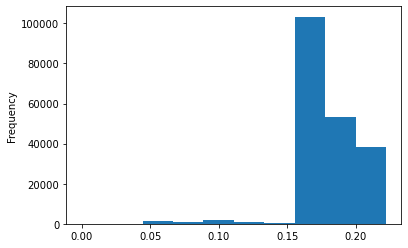

In [3]:
df['tax_share'].plot.hist()

Add some specifications

<AxesSubplot:ylabel='Frequency'>

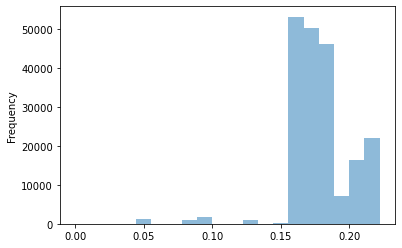

In [4]:
df['tax_share'].plot.hist(bins=20,alpha=0.5)

1.4. Combined histogram

Prepare the data

In [5]:
df_pivot=pd.pivot_table(df, index=["category_int"], values=["price_uah"],
               columns=["year_week"], aggfunc=[np.mean])
print (df_pivot.head(3))

                     mean                                                      \
                price_uah                                                       
year_week         2021W03      2021W04      2021W05      2021W06      2021W07   
category_int                                                                    
10382         3276.573069  3270.641614  3391.850228  3366.470563  3395.006236   
10397         2390.846625  2383.530305  2293.338162  2383.716301  2339.504077   
10409         5037.192261  5160.575039  4828.742864  4979.174093  5228.300414   

                           
                           
year_week         2021W08  
category_int               
10382         3224.567391  
10397         2436.415655  
10409         5432.449622  


Reset column names (pivot column names sometimes is not suitable)

In [6]:
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
df_pivot.index.name = None
df_pivot.columns = ['category_int', '2021W03','2021W04','2021W05','2021W06','2021W07','2021W08']
print (df_pivot.head(3))

  category_int      2021W03      2021W04      2021W05      2021W06  \
0        10382  3276.573069  3270.641614  3391.850228  3366.470563   
1        10397  2390.846625  2383.530305  2293.338162  2383.716301   
2        10409  5037.192261  5160.575039  4828.742864  4979.174093   

       2021W07      2021W08  
0  3395.006236  3224.567391  
1  2339.504077  2436.415655  
2  5228.300414  5432.449622  


Draw a histogram

<AxesSubplot:ylabel='Frequency'>

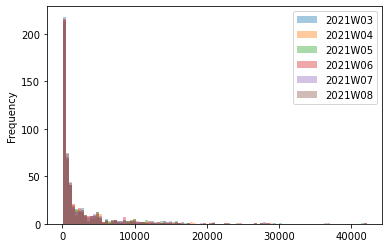

In [10]:
df_pivot.plot.hist(bins=100,alpha=0.4, xlim=[0,20000])

1.5. Basic plot

Prepare data

In [11]:
df_pivot=pd.pivot_table(df, index=["country"], values=["price_uah"],
               columns=['year_week'], aggfunc=[np.mean])
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
df_pivot.index.name = None
df_pivot.columns = ['country', '2021W03','2021W04','2021W05','2021W06','2021W07','2021W08']

Draw a plot

<AxesSubplot:xlabel='country'>

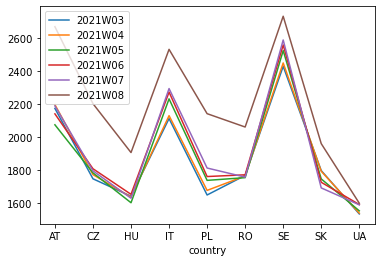

In [18]:
df_pivot.plot(x='country')

Add some specifications

array([<AxesSubplot:xlabel='country'>, <AxesSubplot:xlabel='country'>,
       <AxesSubplot:xlabel='country'>, <AxesSubplot:xlabel='country'>,
       <AxesSubplot:xlabel='country'>, <AxesSubplot:xlabel='country'>],
      dtype=object)

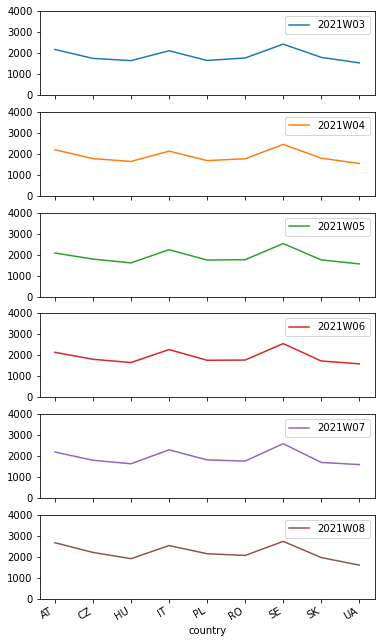

In [17]:
df_pivot.plot(x='country',ylim=[0,4000],subplots=True, figsize=(6, 12))

1.6. Bar chart

<AxesSubplot:xlabel='country'>

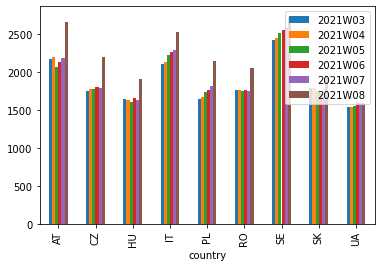

In [19]:
df_pivot.plot.bar(x='country')

Stacked bar chart

Let's prepare data for another example and set condition <b>"stacked=True"</b>

  country    price_uah  price_uah_tf     tax_uah
0      AT  2252.482946   1877.467245  375.015701
1      CZ  1863.786916   1540.544273  323.242644
2      HU  1686.926177   1328.846566  358.079610
3      IT  2269.622883   1860.768193  408.854690
4      PL  1810.154585   1474.373404  335.781180
5      RO  1820.633241   1530.402270  290.230971
6      SE  2552.447321   2042.215659  510.231662
7      SK  1791.477613   1492.869177  298.608437
8      UA  1570.016281   1308.342690  261.673591


<AxesSubplot:xlabel='country'>

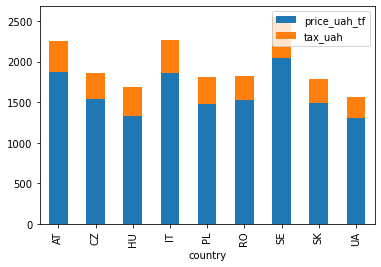

In [20]:
df_pivot=pd.pivot_table(df, index=["country"], values=["price_uah","tax_uah",'price_uah_tf'],
               columns=[], aggfunc=[np.mean])
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
df_pivot.index.name = None
df_pivot.columns = ['country', 'price_uah','price_uah_tf','tax_uah']
print (df_pivot)
df_pivot[['price_uah_tf','tax_uah','country']].plot.bar(x='country',stacked=True)

Stacked horizontal bar chart with <b>barh()</b>

<AxesSubplot:ylabel='country'>

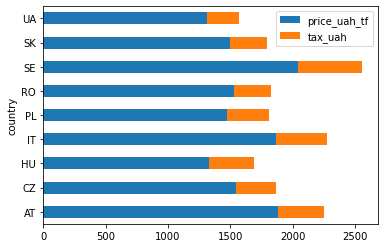

In [21]:
df_pivot[['price_uah_tf','tax_uah','country']].plot.barh(x ='country', stacked=True)

1.7. Area chart

<AxesSubplot:xlabel='country'>

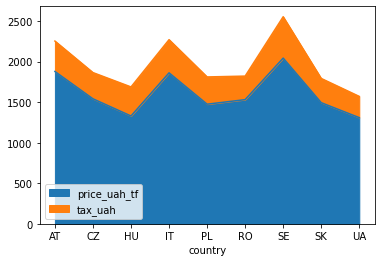

In [22]:
df_pivot[['price_uah_tf','tax_uah','country']].plot.area(x='country')

Unstacked area chart

<AxesSubplot:xlabel='country'>

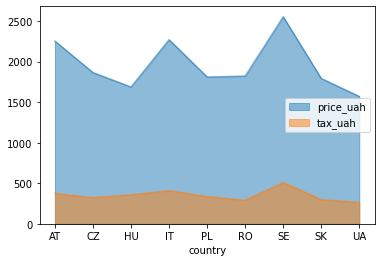

In [23]:
df_pivot[['price_uah','tax_uah','country']].plot.area(x='country',stacked=False) #Alpha value is set to 0.5 unless otherwise specified

1.8. Box plot

this plot type is useful to show data distribution

<AxesSubplot:>

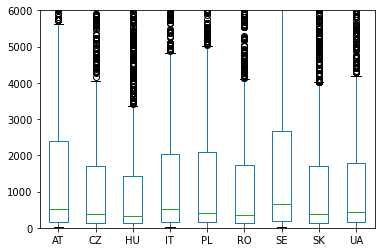

In [24]:
df_pivot=pd.pivot_table(df, index=["product_id"], values=["price_uah"],
               columns=["country"], aggfunc=[np.mean])
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
df_pivot.index.name = None
df_pivot.columns = ['product_id', 'AT','CZ','HU','IT','PL','RO','SE','SK','UA']
df_pivot.plot.box(ylim=[0,6000])

Boxplot can be colorized by passing color keyword. You can pass a dict whose keys are boxes, whiskers, medians and caps. If some keys are missing in the dict, default colors are used for the corresponding artists. Also, boxplot has sym keyword to specify fliers style.

<AxesSubplot:>

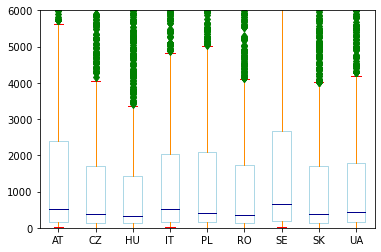

In [28]:
color = {
            "boxes": "LightBlue",
            "whiskers": "DarkOrange",
            "medians": "DarkBlue",
            "caps": "Red",
            }
df_pivot.plot.box(ylim=[0,6000],color=color, sym="gd")

<AxesSubplot:>

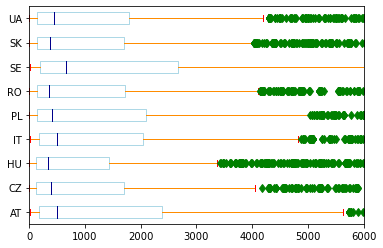

In [29]:
df_pivot.plot.box(vert=False, xlim=[0,6000],color=color, sym="gd")

1.9. Scatter plot

Prepare data

In [30]:
df_pivot=pd.pivot_table(df, index=['product_id'], values=["price_uah","tax_share"],
               columns=["country"], aggfunc=[np.mean])
df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
df_pivot.index.name = None
df_pivot.columns = ['country', 'p_AT','p_CZ','p_HU','p_IT','p_PL','p_RO','p_SE','p_SK','p_UA','t_AT','t_CZ','t_HU','t_IT','t_PL','t_RO','t_SE','t_SK','t_UA']

Compute additional columns

In [31]:
countries=['AT','CZ','HU','IT','PL','RO','SE','SK','UA']
for d in countries:
    l='l_%s'%(d)
    p='p_%s'%(d)
    df_pivot[l] = df_pivot[p] / df_pivot['p_UA']
print (df_pivot)

       country        p_AT         p_CZ        p_HU        p_IT         p_PL  \
0     00015134         NaN    44.458317         NaN    170.7440          NaN   
1     00017133         NaN    50.969100   46.950998         NaN          NaN   
2     00028508  135.654133   129.460650   75.533215    136.7506    97.690429   
3     00030262         NaN          NaN   46.713645    101.7406          NaN   
4     00031841         NaN  1306.375650         NaN         NaN          NaN   
...        ...         ...          ...         ...         ...          ...   
9154  99415915         NaN          NaN         NaN         NaN          NaN   
9155  99417429         NaN   152.883900  140.234119    203.4812   112.806500   
9156  99417434         NaN          NaN         NaN         NaN  1052.472922   
9157  99418532         NaN          NaN         NaN  29701.5986          NaN   
9158  99929241         NaN          NaN         NaN         NaN          NaN   

             p_RO     p_SE         p_SK

Simply apply <b>scatter()</b>

<AxesSubplot:xlabel='l_AT', ylabel='p_AT'>

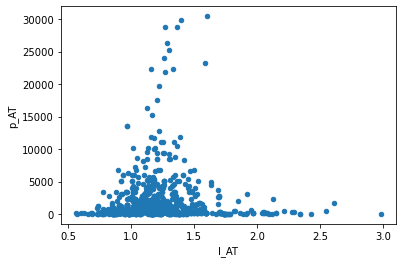

In [32]:
df_pivot.plot.scatter(x="l_AT", y="p_AT")

To plot multiple column groups in a single axes, repeat plot method specifying target <b>ax</b>. It is recommended to specify <b>color</b> and <b>label keywords</b> to distinguish each groups.

<AxesSubplot:xlabel='l_CZ', ylabel='p_CZ'>

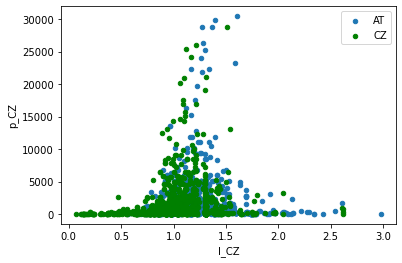

In [33]:
ax = df_pivot.plot.scatter(x="l_AT", y="p_AT", label="AT")
df_pivot.plot.scatter(x="l_CZ", y="p_CZ", color="Green", label="CZ", ax=ax)

We can expand our scatter plot and add some specifications, i.e. axis names

Text(0, 0.5, 'Price')

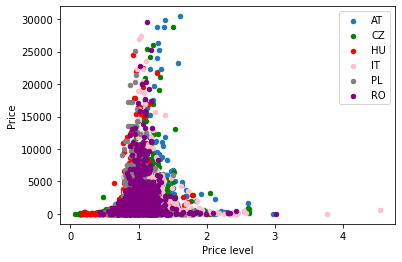

In [34]:
ax = df_pivot.plot.scatter(x="l_AT", y="p_AT", label="AT")
df_pivot.plot.scatter(x="l_CZ", y="p_CZ", color="Green", label="CZ", ax=ax)
df_pivot.plot.scatter(x="l_HU", y="p_HU", color="Red", label="HU", ax=ax)
df_pivot.plot.scatter(x="l_IT", y="p_IT", color="Pink", label="IT", ax=ax)
df_pivot.plot.scatter(x="l_PL", y="p_PL", color="Grey", label="PL", ax=ax)
df_pivot.plot.scatter(x="l_RO", y="p_RO", color="Purple", label="RO", ax=ax)
ax.set_xlabel("Price level")
ax.set_ylabel("Price")

The keyword <b>c</b> may be given as the name of a column to provide colors for each point

<AxesSubplot:xlabel='l_AT', ylabel='p_AT'>

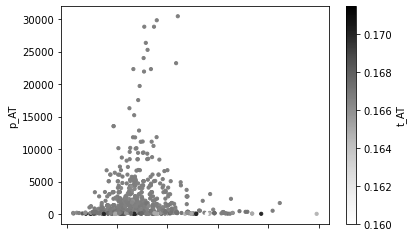

In [35]:
df_pivot.plot.scatter(x="l_AT", y="p_AT", c="t_AT", s=10, label="AT",legend=False)

Column of the DataFrame can be used as the bubble size with keyword <b>s</b>

<AxesSubplot:xlabel='t_AT', ylabel='l_AT'>

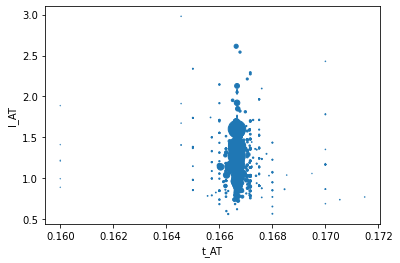

In [37]:
df_pivot.plot.scatter(x="t_AT", y="l_AT", s=df_pivot["p_AT"]/100, xlabel="Tax share", ylabel="Price level",)

# 2. Heat maps

2.1. Prepare dataset

In [38]:
prices=pd.pivot_table(df, index=['year_week', 'product_id'], values=["price_uah_tf"],
               columns=["country"], aggfunc=[np.mean])
prices.reset_index(inplace=True)
prices.columns.name = None
prices.index.name = None
prices.columns = ['year_week', 'product_id','AT','CZ','HU','IT','PL','RO','SE','SK','UA']
print (prices)

      year_week product_id          AT           CZ          HU            IT  \
0       2021W03   00015134         NaN    63.734196         NaN    140.010080   
1       2021W03   00017133         NaN          NaN   37.240399           NaN   
2       2021W03   00028508  113.715504   106.946922   59.810511    112.008064   
3       2021W03   00030262         NaN          NaN         NaN     84.006048   
4       2021W03   00031841         NaN  1079.167902         NaN           NaN   
...         ...        ...         ...          ...         ...           ...   
42734   2021W08   99404592         NaN          NaN         NaN   2165.353740   
42735   2021W08   99412785  451.708378          NaN         NaN           NaN   
42736   2021W08   99415915         NaN          NaN         NaN           NaN   
42737   2021W08   99417429         NaN   126.364161  110.318060    166.722072   
42738   2021W08   99418532         NaN          NaN         NaN  24387.169422   

                PL         

Compute price levels

In [39]:
countries=['AT','CZ','HU','IT','PL','RO','SE','SK','UA']
for d in countries:
    l='l_%s'%(d)
    prices[l] =prices[d] / prices['UA']
print (prices)

      year_week product_id          AT           CZ          HU            IT  \
0       2021W03   00015134         NaN    63.734196         NaN    140.010080   
1       2021W03   00017133         NaN          NaN   37.240399           NaN   
2       2021W03   00028508  113.715504   106.946922   59.810511    112.008064   
3       2021W03   00030262         NaN          NaN         NaN     84.006048   
4       2021W03   00031841         NaN  1079.167902         NaN           NaN   
...         ...        ...         ...          ...         ...           ...   
42734   2021W08   99404592         NaN          NaN         NaN   2165.353740   
42735   2021W08   99412785  451.708378          NaN         NaN           NaN   
42736   2021W08   99415915         NaN          NaN         NaN           NaN   
42737   2021W08   99417429         NaN   126.364161  110.318060    166.722072   
42738   2021W08   99418532         NaN          NaN         NaN  24387.169422   

                PL         

Compute average price levels

In [40]:
countries_mean=prices.groupby(['year_week'])[['l_AT','l_CZ','l_HU','l_IT','l_PL','l_RO','l_SE','l_SK','l_UA']].mean() #() indicates grouping conditions, [] indicates values
print (countries_mean)

               l_AT      l_CZ      l_HU      l_IT      l_PL      l_RO  \
year_week                                                               
2021W03    1.216903  1.036396  0.913056  1.173233  0.932681  1.053571   
2021W04    1.212542  1.023571  0.913562  1.176574  0.933144  1.056385   
2021W05    1.187474  1.029104  0.906024  1.159126  0.922101  1.031259   
2021W06    1.199397  1.046442  0.907936  1.166920  0.926932  1.031194   
2021W07    1.199741  1.042925  0.904606  1.163011  0.927025  1.031109   
2021W08    1.198019  1.042883  0.903525  1.164696  0.926979  1.026683   

               l_SE      l_SK  l_UA  
year_week                            
2021W03    1.113348  1.057648   1.0  
2021W04    1.127192  1.056323   1.0  
2021W05    1.090555  1.037605   1.0  
2021W06    1.098041  1.046603   1.0  
2021W07    1.098485  1.042342   1.0  
2021W08    1.096150  1.049099   1.0  


2.2. Heatmap with <b>pandas</b>

In [41]:
countries_mean.style.background_gradient(cmap='Blues') #colors background by columns

,l_AT,l_CZ,l_HU,l_IT,l_PL,l_RO,l_SE,l_SK,l_UA
year_week,,,,,,,,,
2021W03,1.216903,1.036396,0.913056,1.173233,0.932681,1.053571,1.113348,1.057648,1.000000
2021W04,1.212542,1.023571,0.913562,1.176574,0.933144,1.056385,1.127192,1.056323,1.000000
2021W05,1.187474,1.029104,0.906024,1.159126,0.922101,1.031259,1.090555,1.037605,1.000000
2021W06,1.199397,1.046442,0.907936,1.166920,0.926932,1.031194,1.098041,1.046603,1.000000
2021W07,1.199741,1.042925,0.904606,1.163011,0.927025,1.031109,1.098485,1.042342,1.000000
2021W08,1.198019,1.042883,0.903525,1.164696,0.926979,1.026683,1.096150,1.049099,1.000000


In [42]:
countries_mean.style.background_gradient(cmap='Blues').set_precision(2) #set number format

,l_AT,l_CZ,l_HU,l_IT,l_PL,l_RO,l_SE,l_SK,l_UA
year_week,,,,,,,,,
2021W03,1.22,1.04,0.91,1.17,0.93,1.05,1.11,1.06,1.00
2021W04,1.21,1.02,0.91,1.18,0.93,1.06,1.13,1.06,1.00
2021W05,1.19,1.03,0.91,1.16,0.92,1.03,1.09,1.04,1.00
2021W06,1.20,1.05,0.91,1.17,0.93,1.03,1.10,1.05,1.00
2021W07,1.20,1.04,0.90,1.16,0.93,1.03,1.10,1.04,1.00
2021W08,1.20,1.04,0.90,1.16,0.93,1.03,1.10,1.05,1.00


In [43]:
countries_mean.style.background_gradient(cmap='Blues', axis=None).set_properties(**{'font-size': '0pt'}) # or even delete numbers from table and color background based on the entire matrix

,l_AT,l_CZ,l_HU,l_IT,l_PL,l_RO,l_SE,l_SK,l_UA
year_week,,,,,,,,,
2021W03,1.216903,1.036396,0.913056,1.173233,0.932681,1.053571,1.113348,1.057648,1.000000
2021W04,1.212542,1.023571,0.913562,1.176574,0.933144,1.056385,1.127192,1.056323,1.000000
2021W05,1.187474,1.029104,0.906024,1.159126,0.922101,1.031259,1.090555,1.037605,1.000000
2021W06,1.199397,1.046442,0.907936,1.166920,0.926932,1.031194,1.098041,1.046603,1.000000
2021W07,1.199741,1.042925,0.904606,1.163011,0.927025,1.031109,1.098485,1.042342,1.000000
2021W08,1.198019,1.042883,0.903525,1.164696,0.926979,1.026683,1.096150,1.049099,1.000000


2.3. Heatmap with <b>matplotlib</b>

In [44]:
import matplotlib.pyplot as plt

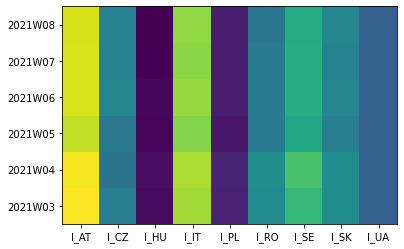

In [45]:
plt.pcolor(countries_mean)
plt.yticks(np.arange(0.5, len(countries_mean.index), 1), countries_mean.index) #used to set ticks names and location
plt.xticks(np.arange(0.5, len(countries_mean.columns), 1), countries_mean.columns)
plt.show()

2.3. Heatmap with <b>seaborn</b>

<AxesSubplot:ylabel='year_week'>

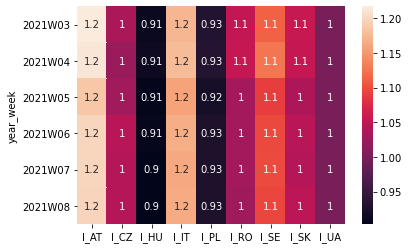

In [46]:
import seaborn as sns
%matplotlib inline

sns.heatmap(countries_mean, annot=True)

<AxesSubplot:ylabel='year_week'>

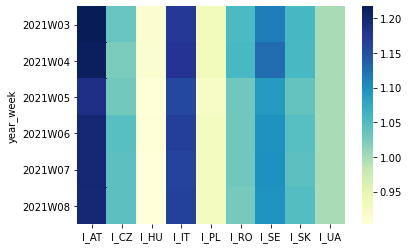

In [47]:
sns.heatmap(countries_mean,cmap="YlGnBu", annot=False)

<AxesSubplot:ylabel='year_week'>

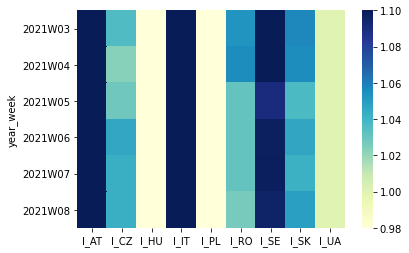

In [48]:
sns.heatmap(countries_mean,cmap="YlGnBu", annot=False,vmin=0.98, vmax=1.1)

<AxesSubplot:ylabel='year_week'>

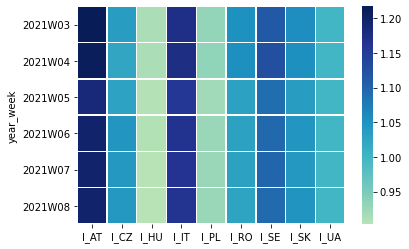

In [49]:
sns.heatmap(countries_mean,cmap="YlGnBu", annot=False,center=1,linewidths=.5)

<AxesSubplot:ylabel='year_week'>

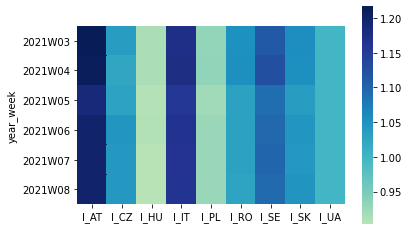

In [50]:
sns.heatmap(countries_mean, annot=False,center=1,cmap="YlGnBu", square=True)

<AxesSubplot:ylabel='year_week'>

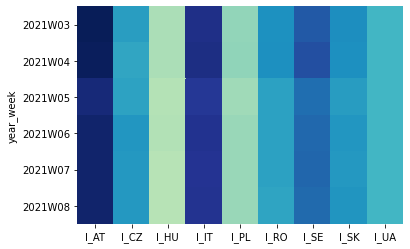

In [51]:
sns.heatmap(countries_mean, annot=False,center=1,cmap="YlGnBu", square=True, cbar=False)

<AxesSubplot:xlabel='year_week'>

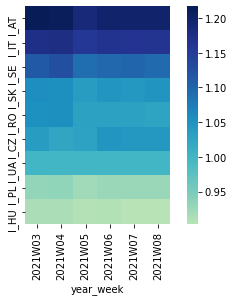

In [52]:
countries_trans = countries_mean.transpose()
sns.heatmap(countries_trans.sort_values('2021W03',ascending=False), annot=False,center=1,cmap="YlGnBu", square=True)

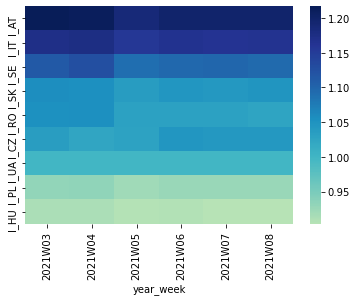

In [53]:
sns_plt= sns.heatmap(countries_trans.sort_values('2021W03',ascending=False), annot=False,center=1,cmap="YlGnBu")

In [54]:
figure = sns_plt.get_figure()    
figure.savefig('IKEA/price_levels.png', dpi=400)